In [1]:
import upldmx
import awkward as ak
import numpy as np

In [2]:
events = upldmx.load_rec_hits()

In [3]:
tot_eot = ak.count(events.weight)/ak.sum(events.weight)*10*1e6
per_day = 1e12/tot_eot
num_events = ak.count(events.weight)
print(f'{num_events} in {tot_eot:.2e} EoT')
print(f'  which is ~{num_events*per_day:.0f} per day')

65508 in 8.63e+12 EoT
  which is ~7595 per day


In [4]:
import matplotlib as mpl
import mplhep
%matplotlib inline
mpl.style.use(mplhep.style.ROOT)
import matplotlib.pyplot as plt

import hist

In [5]:
xmax = 300
ymax = 300
hitmap = (
    hist.Hist.new
    .Reg(2*xmax,-xmax,xmax,label='x')
    .Reg(2*ymax,-ymax,ymax,label='y')
    .Double()
)

In [6]:
hits_in_first_layer = events.EcalRecHits[events.EcalRecHits.layer() == 0]
highest_energy_hit_in_first_layer = ak.drop_none(
    ak.firsts(
        hits_in_first_layer[ak.argsort(hits_in_first_layer.amplitude)]
    )
)

In [7]:
hitid = hist.Hist.new.IntCategory([],growth=True).Double()
hitid.fill(highest_energy_hit_in_first_layer.id)

def get_cell_center(id):
    hits_in_cell= highest_energy_hit_in_first_layer[highest_energy_hit_in_first_layer.id==id]
    return np.array([ak.mean(hits_in_cell.xpos), ak.mean(hits_in_cell.ypos)])
cell_center = np.array([get_cell_center(id) for id in hitid.axes[0]])

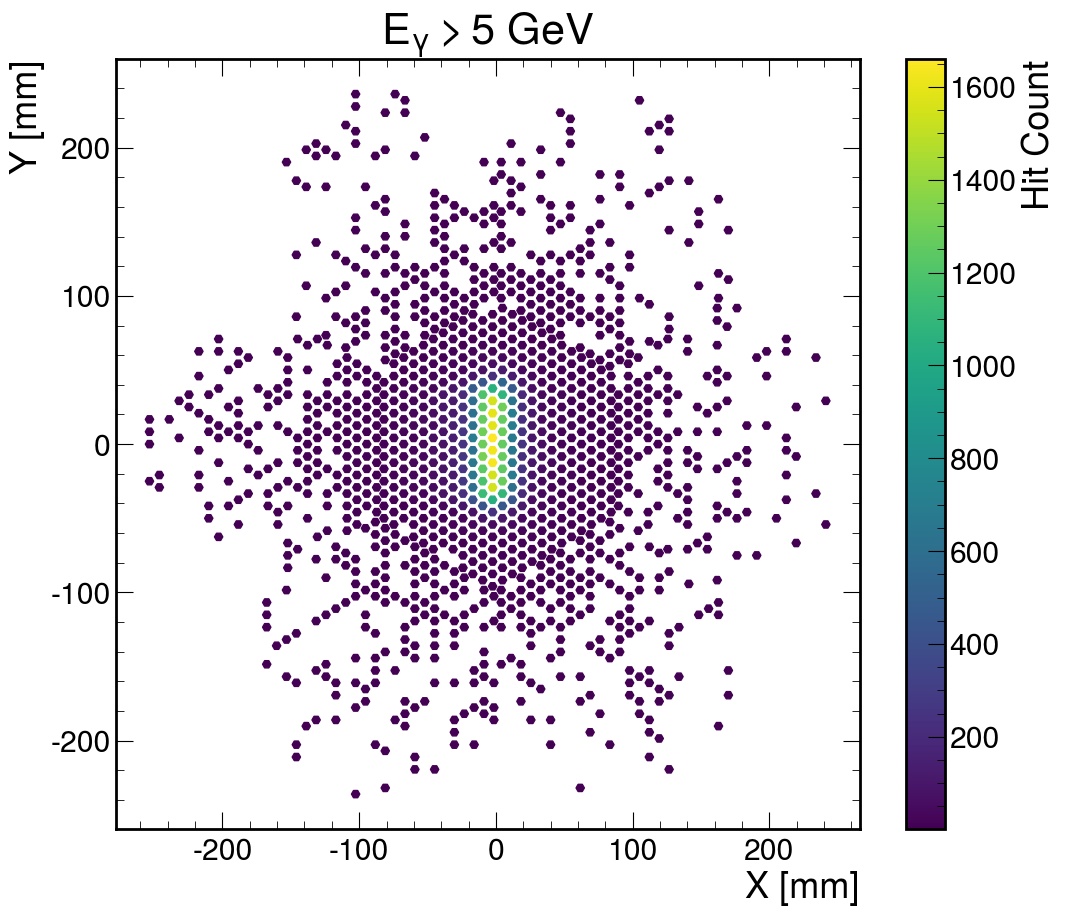

In [8]:
plt.figure(figsize=(12,10))
plt.scatter(
    cell_center[:,0], cell_center[:,1],
    c = hitid.values(),
    marker='H'
)
plt.colorbar(label='Hit Count')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('$E_\\gamma > 5~$GeV')
plt.show()